In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
train_dir = '/kaggle/input/facial-expression-dataset/train/train/'
test_dir = '/kaggle/input/facial-expression-dataset/test/test/'

In [12]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [13]:
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(train_dir)
train = train.sample(frac=1).reset_index(drop=True)
train.head()

surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


,image,label
0,/kaggle/input/facial-expression-dataset/train/...,sad
1,/kaggle/input/facial-expression-dataset/train/...,surprise
2,/kaggle/input/facial-expression-dataset/train/...,neutral
3,/kaggle/input/facial-expression-dataset/train/...,fear
4,/kaggle/input/facial-expression-dataset/train/...,surprise


In [14]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(test_dir)
test.head()

surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


,image,label
0,/kaggle/input/facial-expression-dataset/test/t...,surprise
1,/kaggle/input/facial-expression-dataset/test/t...,surprise
2,/kaggle/input/facial-expression-dataset/test/t...,surprise
3,/kaggle/input/facial-expression-dataset/test/t...,surprise
4,/kaggle/input/facial-expression-dataset/test/t...,surprise


<Axes: xlabel='label', ylabel='count'>

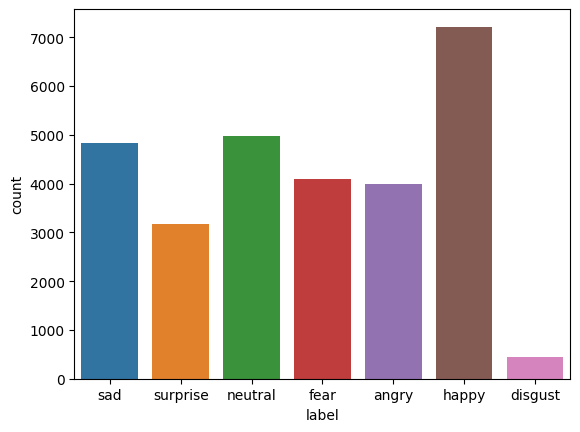

In [17]:
sns.countplot(data=train, x='label')

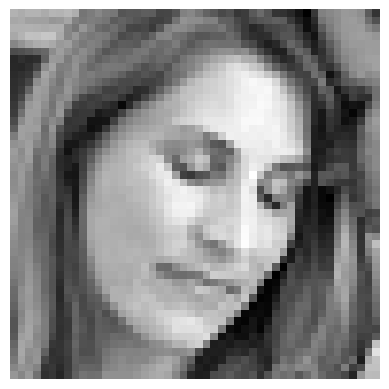

In [26]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray')
plt.axis("off");

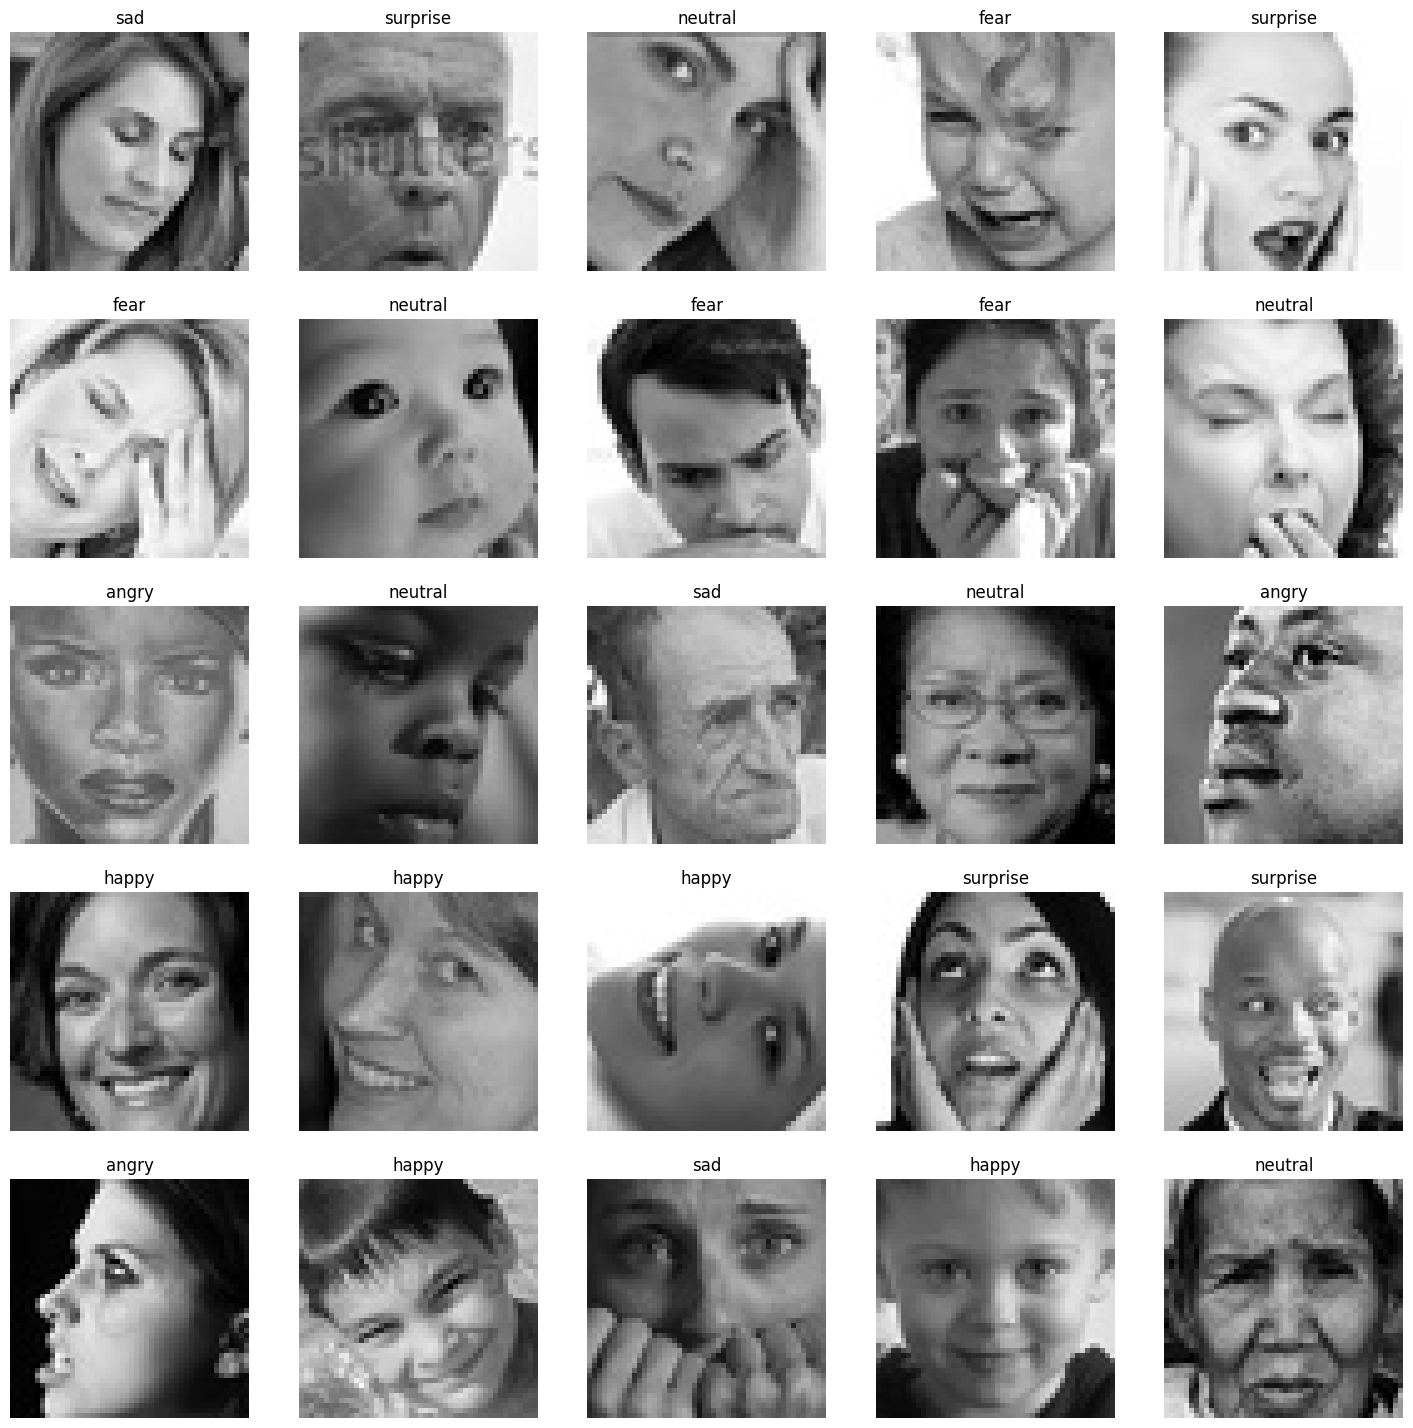

In [30]:
from tensorflow.keras.utils import load_img

plt.figure(figsize=(18,18))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [31]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48, 48, 1)
    return features

In [32]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [33]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [34]:
x_train = train_features/255.0
x_test = test_features/255.0 

In [35]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
en.fit(train['label'])
y_train = en.transform(train['label'])
y_test = en.transform(test['label'])

In [37]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [38]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [39]:
input_shape = (48, 48, 1)
output_class = 7

In [42]:
model = Sequential()
#convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

#Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

#Output Layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [44]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


2023-09-13 20:23:35.002872: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


225/225 [==============================] - 26s 54ms/step - loss: 1.8231 - accuracy: 0.2489 - val_loss: 1.8209 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 11s 49ms/step - loss: 1.8091 - accuracy: 0.2514 - val_loss: 1.7910 - val_accuracy: 0.2534
Epoch 3/100
225/225 [==============================] - 11s 49ms/step - loss: 1.7619 - accuracy: 0.2732 - val_loss: 1.6918 - val_accuracy: 0.3057
Epoch 4/100
225/225 [==============================] - 11s 49ms/step - loss: 1.6757 - accuracy: 0.3235 - val_loss: 1.5410 - val_accuracy: 0.3990
Epoch 5/100
225/225 [==============================] - 11s 50ms/step - loss: 1.5802 - accuracy: 0.3789 - val_loss: 1.4441 - val_accuracy: 0.4436
Epoch 6/100
225/225 [==============================] - 11s 50ms/step - loss: 1.4975 - accuracy: 0.4177 - val_loss: 1.3734 - val_accuracy: 0.4755
Epoch 7/100
225/225 [==============================] - 11s 50ms/step - loss: 1.4403 - accuracy: 0.4440 - val_loss: 1.3413 - val_accuracy: 0.48

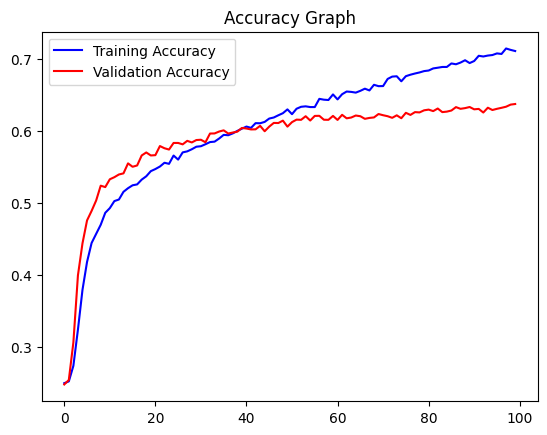

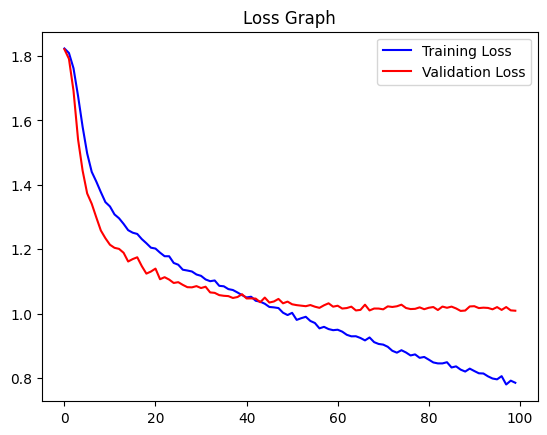

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: neutral
1/1 [==============================] - 0s 20ms/step
Predicted Output: neutral


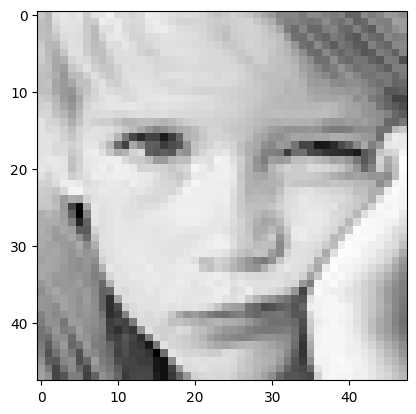

In [56]:
import random

image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = en.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')
plt.axis('off');

Original Output: happy
1/1 [==============================] - 0s 20ms/step
Predicted Output: happy


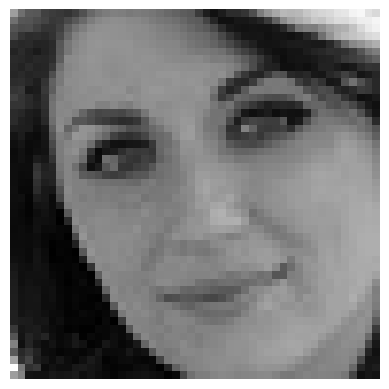

In [57]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = en.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')
plt.axis("off");

Original Output: surprise
1/1 [==============================] - 0s 20ms/step
Predicted Output: surprise


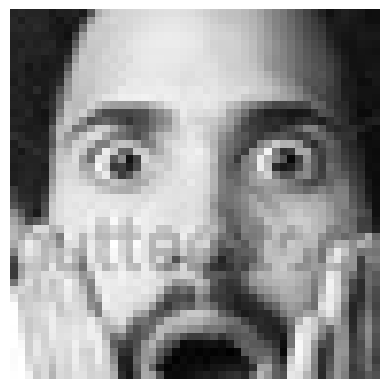

In [58]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = en.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')
plt.axis("off");

Original Output: happy
1/1 [==============================] - 0s 19ms/step
Predicted Output: happy


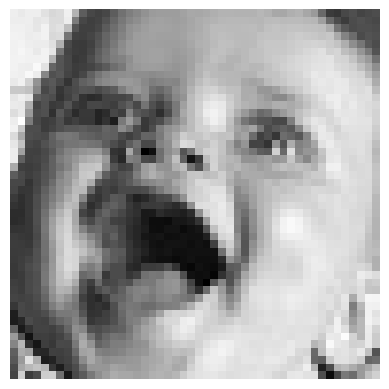

In [60]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = en.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')
plt.axis("off");

Original Output: happy
1/1 [==============================] - 0s 20ms/step
Predicted Output: happy


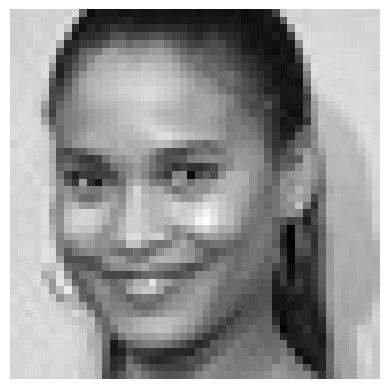

In [61]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = en.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')
plt.axis("off");

Original Output: angry
1/1 [==============================] - 0s 20ms/step
Predicted Output: angry


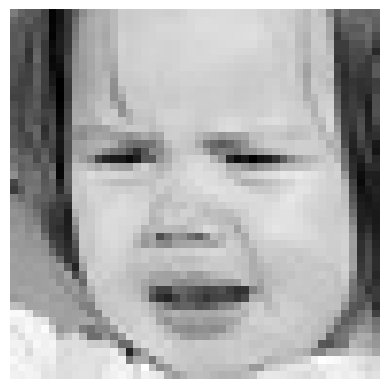

In [62]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = en.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')
plt.axis("off");